In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/rotten-tomatoes-movies-and-critics-datasets/rotten_tomatoes_movies.csv
/kaggle/input/rotten-tomatoes-movies-and-critics-datasets/rotten_tomatoes_reviews.csv


In [2]:
CSV_PATH = "../input/rotten-tomatoes-movies-and-critics-datasets/rotten_tomatoes_movies.csv"
df = pd.read_csv(CSV_PATH)

print("Head (below): ")
df.head()

Head (below): 


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,...,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,20th Century Fox,Rotten,49,144,Spilled,53.0,254287.0,38,71,73
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Sony Pictures Classics,Certified Fresh,86,140,Upright,64.0,11567.0,43,121,19
2,/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,Waner Bros.,Fresh,68,22,Spilled,53.0,14670.0,2,15,7
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,https://resizing.flixster.com/u-8xAyGaDVvROLiR...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Criterion Collection,Certified Fresh,100,51,Upright,97.0,105000.0,6,51,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",https://resizing.flixster.com/FKExgYBHu07XLoil...,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,Disney,Fresh,89,27,Upright,74.0,68860.0,5,24,3


In [3]:
# A little pre-processing.
# Make genre comma-separated -> non. comma separated
print("Creating individual genre columns [Animation, Drama, Horror, ...] and saving to data frame")
genre_cols = df.genre.str.get_dummies(sep=', ')
# print(genre_cols)
for col in genre_cols:
    df[col + '_genre'] = genre_cols[col].values

# Make ratings label-encoded
print("Replacing ratings [PG, G, R, ... etc] with numbers 0 - ...")
unique = df['rating'].unique()
print(unique)
label_encoder = LabelEncoder()
df.rating = label_encoder.fit_transform(df.rating)
unique = df['rating'].unique()
print(unique)
# print(df.rating)

# Then drop the old genre/cast/direc/writers columns
# df.drop(['genre', 'cast', 'directors', 'writers'], axis=1)
    
print("Columns provided: ")
print(df.columns)

print("Head (below): ")
df.head()

Creating individual genre columns [Animation, Drama, Horror, ...] and saving to data frame
Replacing ratings [PG, G, R, ... etc] with numbers 0 - ...
['PG' 'R' 'NR' 'G' 'PG-13' 'PG-13)' 'NC17' 'R)']
[3 6 2 0 4 5 1 7]
Columns provided: 
Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'poster_image_url', 'rating', 'genre', 'directors',
       'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_status',
       'audience_rating', 'audience_count', 'audience_top_critics_count',
       'audience_fresh_critics_count', 'audience_rotten_critics_count',
       'Action & Adventure_genre', 'Animation_genre', 'Anime & Manga_genre',
       'Art House & International_genre', 'Classics_genre', 'Comedy_genre',
       'Cult Movies_genre', 'Documentary_genre', 'Drama_genre',
       'Faith & Spirituality_genre', 'Gay & Lesbian_genre',

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,...,Horror_genre,Kids & Family_genre,Musical & Performing Arts_genre,Mystery & Suspense_genre,Romance_genre,Science Fiction & Fantasy_genre,Special Interest_genre,Sports & Fitness_genre,Television_genre,Western_genre
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,3,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,0,0,0,0,0,1,0,0,0,0
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,6,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,0,0,0,0,0,0,0,0,0,0
2,/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,6,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,0,0,0,0,1,0,0,0,0,0
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,https://resizing.flixster.com/u-8xAyGaDVvROLiR...,2,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,0,0,0,0,0,0,0,0,0,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",https://resizing.flixster.com/FKExgYBHu07XLoil...,0,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,0,1,0,0,0,0,0,0,0,0


In [4]:
df = df.dropna(axis=0)
# print(df) reveals no columns were dropped. Imputation not needed.
# unique = df['in_theaters_date'].unique()
# print(sorted(unique))

# y = df['tomatometer_status']

y = df['tomatometer_rating']
X = df[['rating', 'runtime_in_minutes', 'Action & Adventure_genre', 'Animation_genre', 'Anime & Manga_genre',
       'Art House & International_genre', 'Classics_genre', 'Comedy_genre',
       'Cult Movies_genre', 'Documentary_genre', 'Drama_genre',
       'Faith & Spirituality_genre', 'Gay & Lesbian_genre', 'Horror_genre',
       'Kids & Family_genre', 'Musical & Performing Arts_genre',
       'Mystery & Suspense_genre', 'Romance_genre',
       'Science Fiction & Fantasy_genre', 'Special Interest_genre',
       'Sports & Fitness_genre', 'Television_genre', 'Western_genre', 'studio_name']]

# Split our data
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

# print(X_train.shape)
# print(" vs ")
# print(X_valid.shape)

# Determine columns that are categorical in nature
obj = (X.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical: ")
print(object_cols)

# one-hot encode rating, directors, writers, studio_name 
OH_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[object_cols]))

OH_cols.index = X.index

numerical_X = X.drop(object_cols, axis = 1)

OH_X = pd.concat([numerical_X, OH_cols], axis=1)

print("Complete shape of feature dataframe: ")
print(OH_X.shape)
#y_train.head()
# y_valid.head()

# Split our data
X_train, X_valid, y_train, y_valid = train_test_split(OH_X, y, random_state=0)

print("Verify that the columns are same size: ")
print(X_train.shape)
print(" vs ")
print(X_valid.shape)

Categorical: 
['studio_name']
Complete shape of feature dataframe: 
(7610, 1142)
Verify that the columns are same size: 
(5707, 1142)
 vs 
(1903, 1142)


In [5]:
def mean_absolute_percentage_error(y_valid, y_prediction): 
    y_valid = np.array(y_valid)
    y_prediction = np.array(y_prediction)
    return np.mean(np.abs((y_valid - y_prediction) / y_valid)) * 100

In [6]:
model = None;
predictions = None;

def train_and_validate(DX_train, DX_valid, Dy_train, Dy_valid) :
    global model
    global predictions 
    
    model = RandomForestRegressor(random_state = 1)
    model.fit(DX_train, Dy_train)
    
    predictions = model.predict(DX_valid)
    print(predictions)
    
    mae = mean_absolute_error(Dy_valid, predictions)
    # print("MAE = " + str(mae))
    
    return mae

def train_and_validate(mln, DX_train, DX_valid, Dy_train, Dy_valid) :
    global model
    global predictions 
    
    model = RandomForestRegressor(max_leaf_nodes=mln, random_state = 1)
    model.fit(DX_train, Dy_train)
    
    predictions = model.predict(DX_valid)
    print(predictions)
    
    print(" ... vs ...")
    print(Dy_valid)
    
    mae = mean_absolute_error(Dy_valid, predictions)
    # print("MAE = " + str(mae))
    
    return mae

def xg_train_and_validate(DX_train, DX_valid, Dy_train, Dy_valid) :
    global model
    global predictions 
    
    model = XGBRegressor(n_estimators=350, learning_rate=0.20, n_jobs=4, random_state=1)
    model.fit(DX_train, Dy_train, early_stopping_rounds=5, 
              eval_set=[(DX_valid, Dy_valid)], verbose=False)
    
    predictions = model.predict(DX_valid)
    print(predictions)
    
    print(" ... vs ...")
    print(Dy_valid)
    
    mae = mean_absolute_error(Dy_valid, predictions)
    # print("MAE = " + str(mae))
    print("MAPE = " + str(mean_absolute_percentage_error(Dy_valid, predictions)))
    
    return mae

In [7]:
# This reveals ~400 max leaf nodes for the RandomForest model provides MAE of ~19:

for max_leaf_nodes in [4, 40, 400, 1600, 64000]:
    mae = train_and_validate(max_leaf_nodes, X_train, X_valid, y_train, y_valid)
    print("Max leaf nodes: %d  \t Mean Absolute Error:  %f" %(max_leaf_nodes, mae))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[64.52868826 64.52868826 78.98846281 ... 58.99984296 70.61802545
 50.95556085]
 ... vs ...
737      98
10978    97
1247     27
14372    15
1713     85
         ..
1893     64
4257     88
4744     71
2514     83
7903     86
Name: tomatometer_rating, Length: 1903, dtype: int64
Max leaf nodes: 4  	 Mean Absolute Error:  22.046799


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[76.36872017 73.49129561 77.91784425 ... 54.99161026 72.39179964
 50.57281136]
 ... vs ...
737      98
10978    97
1247     27
14372    15
1713     85
         ..
1893     64
4257     88
4744     71
2514     83
7903     86
Name: tomatometer_rating, Length: 1903, dtype: int64
Max leaf nodes: 40  	 Mean Absolute Error:  20.192440


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[81.51816023 75.40866702 79.23194039 ... 58.12724402 61.92464059
 56.26822054]
 ... vs ...
737      98
10978    97
1247     27
14372    15
1713     85
         ..
1893     64
4257     88
4744     71
2514     83
7903     86
Name: tomatometer_rating, Length: 1903, dtype: int64
Max leaf nodes: 400  	 Mean Absolute Error:  19.815716


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[78.65864504 70.35       84.28519184 ... 61.57016484 65.12055528
 63.19096408]
 ... vs ...
737      98
10978    97
1247     27
14372    15
1713     85
         ..
1893     64
4257     88
4744     71
2514     83
7903     86
Name: tomatometer_rating, Length: 1903, dtype: int64
Max leaf nodes: 1600  	 Mean Absolute Error:  20.264396


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[79.9 71.  83.8 ... 60.8 58.3 63.5]
 ... vs ...
737      98
10978    97
1247     27
14372    15
1713     85
         ..
1893     64
4257     88
4744     71
2514     83
7903     86
Name: tomatometer_rating, Length: 1903, dtype: int64
Max leaf nodes: 64000  	 Mean Absolute Error:  20.490648


In [8]:
# Predict with self.
print("MAE [self] = %d" %(xg_train_and_validate(X_train, X_train, y_train, y_train)) )

# Predict with validation data.
print("MAE [validation] = %d" %(xg_train_and_validate(X_train, X_valid, y_train, y_valid)) )

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:28:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[78.066345 69.377525 69.61798  ... 45.044754 69.29976  69.908394]
 ... vs ...
9194     86
11571    96
10737    81
15333    46
11402    87
         ..
10904    77
7199     87
3668     21
5756     56
6030     70
Name: tomatometer_rating, Length: 5707, dtype: int64
MAPE = inf
MAE [self] = 17


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:29:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[85.79117 76.08711 65.46227 ... 58.87415 67.76201 64.99933]
 ... vs ...
737      98
10978    97
1247     27
14372    15
1713     85
         ..
1893     64
4257     88
4744     71
2514     83
7903     86
Name: tomatometer_rating, Length: 1903, dtype: int64
MAPE = inf
MAE [validation] = 19


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [9]:
print(predictions) # compare with y_valid
valid = y_valid.to_numpy() #indices, as you see above, are not neat (y_valid[737], y_valid[10978], ...). convert it to numpy array.    # .index.values
corresponding_rating = X_valid.rating.to_numpy() # removes indices.

print(predictions.shape)
print(valid.shape)

print(corresponding_rating)

hist_X = np.zeros(6) # => keep sum [G, NC17, NR, PG, PG-13 and PG-13), R and R)]
count_X = np.zeros(6) # => keep count

err = np.zeros( (predictions.shape[0]) )

for i in range(predictions.shape[0]):
    err[i] = abs(predictions[i] - valid[i])
    # print("This: " + str(corresponding_rating[i]) + " with error " + str(err[i]))
    if(corresponding_rating[i] == 0): #G
        hist_X[0] = (err[i] + hist_X[0])
        count_X[0] += 1
    elif (corresponding_rating[i] == 1): #NC-17
        hist_X[1] = (err[i] + hist_X[1])
        count_X[1] += 1
    elif (corresponding_rating[i] == 2): #NR
        hist_X[2] = (err[i] + hist_X[2])
        count_X[2] += 1
    elif (corresponding_rating[i] == 3): #PG
        hist_X[3] = (err[i] + hist_X[3])
        count_X[3] += 1
    elif (corresponding_rating[i] == 4 or corresponding_rating[i] == 5): #PG-13 || PG-13)
        hist_X[4] = (err[i] + hist_X[4])
        count_X[4] += 1
    elif (corresponding_rating[i] == 6 or corresponding_rating[i] == 7): #R || R)
        hist_X[5] = (err[i] + hist_X[5])
        count_X[5] += 1
        
        
for j in range(6):
    hist_X[j] = (hist_X[j] / float(count_X[j]))

print ("\nMean error compared with admission ratings...\n\t[G, NC17, NR, PG, PG-13, R] <=> " + str(hist_X))

[85.79117 76.08711 65.46227 ... 58.87415 67.76201 64.99933]
(1903,)
(1903,)
[3 6 0 ... 6 4 6]

Mean error compared with admission ratings...
	[G, NC17, NR, PG, PG-13, R] <=> [17.17956752 19.56365395 12.724407   21.31040411 21.89151695 20.20572742]


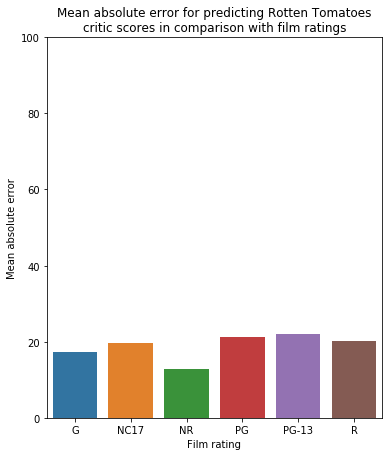

In [10]:
plt.figure(figsize=(6,7))
plt.ylim(0, 100)
plt.title("Mean absolute error for predicting Rotten Tomatoes\ncritic scores in comparison with film ratings")
plt.ylabel("Mean absolute error")
plt.xlabel("Film rating")
s_plot = sns.barplot(x=np.array(['G', 'NC17', 'NR', 'PG', 'PG-13', 'R']), y=hist_X)
